In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import scipy

In [2]:
data = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')

In [3]:
data_us=data[data.loc[:,'Country']=='United States'].copy()
data_us['City'].unique()

array(['Chicago', 'Los Angeles', 'New York'], dtype=object)

In [4]:
data_chicago=data[data.loc[:,'City']=='Chicago'].copy()
data_LA=data[data.loc[:,'City']=='Los Angeles'].copy()
data_NY=data[data.loc[:,'City']=='New York'].copy()
print(np.any(data_chicago.isna()), np.any(data_LA.isna()), np.any(data_NY.isna()))

True False True


In [5]:
data_LA

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
131846,1849-01-01,8.819,2.558,Los Angeles,United States,34.56N,118.70W
131847,1849-02-01,9.577,1.970,Los Angeles,United States,34.56N,118.70W
131848,1849-03-01,11.814,2.173,Los Angeles,United States,34.56N,118.70W
131849,1849-04-01,13.704,2.902,Los Angeles,United States,34.56N,118.70W
131850,1849-05-01,14.834,2.017,Los Angeles,United States,34.56N,118.70W
...,...,...,...,...,...,...,...
133818,2013-05-01,19.028,0.531,Los Angeles,United States,34.56N,118.70W
133819,2013-06-01,22.434,0.416,Los Angeles,United States,34.56N,118.70W
133820,2013-07-01,25.090,0.334,Los Angeles,United States,34.56N,118.70W
133821,2013-08-01,24.232,0.384,Los Angeles,United States,34.56N,118.70W


In [6]:
dataset=data_LA.iloc[:-9,[0,1]].copy()
dataset

,dt,AverageTemperature
131846,1849-01-01,8.819
131847,1849-02-01,9.577
131848,1849-03-01,11.814
131849,1849-04-01,13.704
131850,1849-05-01,14.834
...,...,...
133809,2012-08-01,26.892
133810,2012-09-01,24.745
133811,2012-10-01,18.712
133812,2012-11-01,13.903


In [7]:
dataset.dt = pd.to_datetime(dataset.dt)
dataset=dataset.set_index('dt')

<AxesSubplot:title={'center':'Los Angeles Avg Temperature Data'}, xlabel='Year', ylabel='Temperature'>

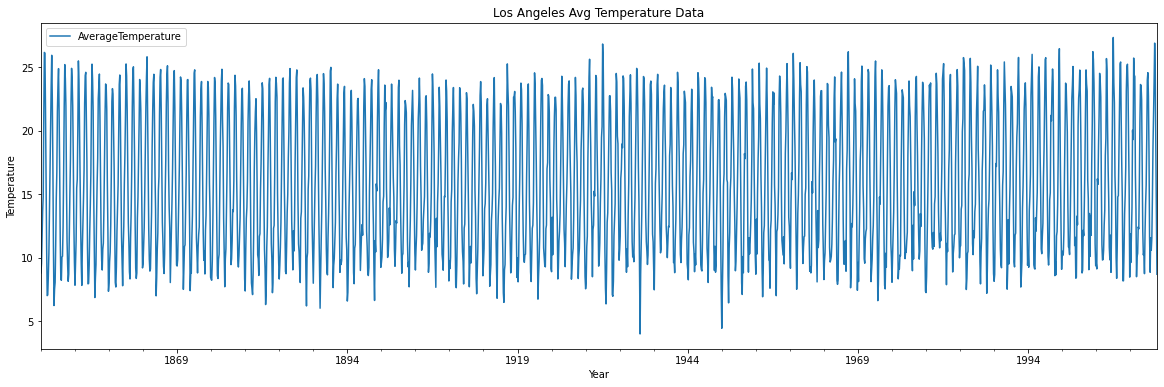

In [8]:
dataset.plot(figsize=(20,6),xlabel='Year',ylabel='Temperature',title='Los Angeles Avg Temperature Data')

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

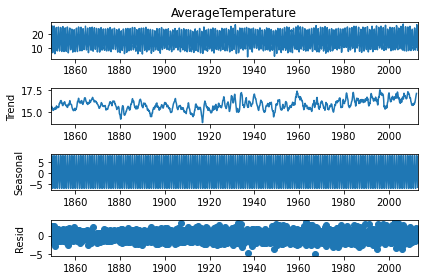

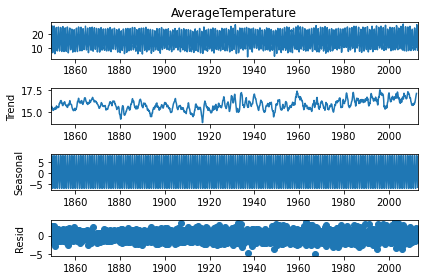

In [10]:
results=seasonal_decompose(dataset['AverageTemperature'])
results.plot()

In [11]:
len(dataset)

1968

In [12]:
train=dataset.iloc[:1932]
test=dataset.iloc[1932:]
print(train.shape, test.shape)

(1932, 1) (36, 1)


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.fit_transform(test)

In [14]:
train_scaled[:12]

array([[0.20596055],
       [0.23846484],
       [0.33439108],
       [0.41543739],
       [0.46389365],
       [0.73572041],
       [0.9495283 ],
       [0.9469554 ],
       [0.76466552],
       [0.53743568],
       [0.29549743],
       [0.12933105]])

In [15]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [16]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(train_scaled,train_scaled,length=n_input,batch_size=1)

In [17]:
print(len(train_scaled),len(generator))

1932 1920


In [18]:
X,y = generator[1]
print(X.flatten(),y)

[0.23846484 0.33439108 0.41543739 0.46389365 0.73572041 0.9495283
 0.9469554  0.76466552 0.53743568 0.29549743 0.12933105 0.13168954] [[0.19549743]]


In [19]:
X.shape

(1, 12, 1)

In [20]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [21]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001,name='Adam'), loss='mse',metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [23]:
# fit model
model.fit(generator,epochs=500)

Epoch 1/500
1920/1920 [==============================] - 17s 8ms/step - loss: 0.0372 - accuracy: 0.0010
Epoch 2/500
1920/1920 [==============================] - 15s 8ms/step - loss: 0.0043 - accuracy: 0.0010
Epoch 3/500
1920/1920 [==============================] - 15s 8ms/step - loss: 0.0037 - accuracy: 0.0010
Epoch 4/500
1920/1920 [==============================] - 15s 8ms/step - loss: 0.0036 - accuracy: 0.0010
Epoch 5/500
1920/1920 [==============================] - 15s 8ms/step - loss: 0.0036 - accuracy: 0.0010
Epoch 6/500
1920/1920 [==============================] - 16s 8ms/step - loss: 0.0036 - accuracy: 0.0010
Epoch 7/500
1920/1920 [==============================] - 15s 8ms/step - loss: 0.0036 - accuracy: 0.0010
Epoch 8/500
1920/1920 [==============================] - 15s 8ms/step - loss: 0.0036 - accuracy: 0.0010
Epoch 9/500
1920/1920 [==============================] - 15s 8ms/step - loss: 0.0034 - accuracy: 0.0010
Epoch 10/500
1920/1920 [==============================] - 15s 8m

1920/1920 [==============================] - 13s 7ms/step - loss: 0.0030 - accuracy: 0.0010
Epoch 80/500
1920/1920 [==============================] - 13s 7ms/step - loss: 0.0031 - accuracy: 0.0010
Epoch 81/500
1920/1920 [==============================] - 13s 7ms/step - loss: 0.0030 - accuracy: 0.0010
Epoch 82/500
1920/1920 [==============================] - 13s 7ms/step - loss: 0.0030 - accuracy: 0.0010
Epoch 83/500
1920/1920 [==============================] - 13s 7ms/step - loss: 0.0030 - accuracy: 0.0010
Epoch 84/500
1920/1920 [==============================] - 13s 7ms/step - loss: 0.0030 - accuracy: 0.0010
Epoch 85/500
1920/1920 [==============================] - 13s 7ms/step - loss: 0.0031 - accuracy: 0.0010
Epoch 86/500
1920/1920 [==============================] - 13s 7ms/step - loss: 0.0030 - accuracy: 0.0010
Epoch 87/500
1920/1920 [==============================] - 14s 7ms/step - loss: 0.0030 - accuracy: 0.0010
Epoch 88/500
1920/1920 [==============================] - 13s 7ms/st

1920/1920 [==============================] - 13s 7ms/step - loss: 0.0029 - accuracy: 0.0010
Epoch 157/500
1920/1920 [==============================] - 13s 7ms/step - loss: 0.0029 - accuracy: 0.0010
Epoch 158/500
1920/1920 [==============================] - 13s 7ms/step - loss: 0.0029 - accuracy: 0.0010
Epoch 159/500
1920/1920 [==============================] - 13s 7ms/step - loss: 0.0029 - accuracy: 0.0010
Epoch 160/500
1920/1920 [==============================] - 13s 7ms/step - loss: 0.0029 - accuracy: 0.0010
Epoch 161/500
1920/1920 [==============================] - 13s 7ms/step - loss: 0.0029 - accuracy: 0.0010
Epoch 162/500
1920/1920 [==============================] - 12s 6ms/step - loss: 0.0029 - accuracy: 0.0010
Epoch 163/500
1920/1920 [==============================] - 12s 6ms/step - loss: 0.0029 - accuracy: 0.0010
Epoch 164/500
1920/1920 [==============================] - 12s 6ms/step - loss: 0.0029 - accuracy: 0.0010
Epoch 165/500
1920/1920 [==============================] - 1

1920/1920 [==============================] - 13s 7ms/step - loss: 0.0029 - accuracy: 0.0010
Epoch 234/500
1920/1920 [==============================] - 13s 7ms/step - loss: 0.0029 - accuracy: 0.0010
Epoch 235/500
1920/1920 [==============================] - 13s 7ms/step - loss: 0.0029 - accuracy: 0.0010
Epoch 236/500
1920/1920 [==============================] - 13s 7ms/step - loss: 0.0029 - accuracy: 0.0010
Epoch 237/500
1920/1920 [==============================] - 12s 6ms/step - loss: 0.0029 - accuracy: 0.0010
Epoch 238/500
1920/1920 [==============================] - 13s 7ms/step - loss: 0.0029 - accuracy: 0.0010
Epoch 239/500
1920/1920 [==============================] - 11s 6ms/step - loss: 0.0029 - accuracy: 0.0010
Epoch 240/500
1920/1920 [==============================] - 12s 6ms/step - loss: 0.0029 - accuracy: 0.0010
Epoch 241/500
1920/1920 [==============================] - 12s 6ms/step - loss: 0.0029 - accuracy: 0.0010
Epoch 242/500
1920/1920 [==============================] - 1

1920/1920 [==============================] - 13s 7ms/step - loss: 0.0028 - accuracy: 0.0010
Epoch 311/500
1920/1920 [==============================] - 13s 7ms/step - loss: 0.0028 - accuracy: 0.0010
Epoch 312/500
1920/1920 [==============================] - 13s 7ms/step - loss: 0.0028 - accuracy: 0.0010
Epoch 313/500
1920/1920 [==============================] - 11s 6ms/step - loss: 0.0028 - accuracy: 0.0010
Epoch 314/500
1920/1920 [==============================] - 13s 7ms/step - loss: 0.0028 - accuracy: 0.0010
Epoch 315/500
1920/1920 [==============================] - 13s 7ms/step - loss: 0.0028 - accuracy: 0.0010
Epoch 316/500
1920/1920 [==============================] - 10s 5ms/step - loss: 0.0028 - accuracy: 0.0010
Epoch 317/500
1920/1920 [==============================] - 13s 7ms/step - loss: 0.0028 - accuracy: 0.0010
Epoch 318/500
1920/1920 [==============================] - 13s 7ms/step - loss: 0.0028 - accuracy: 0.0010
Epoch 319/500
1920/1920 [==============================] - 1

1920/1920 [==============================] - 13s 7ms/step - loss: 0.0028 - accuracy: 0.0010
Epoch 388/500
1920/1920 [==============================] - 12s 6ms/step - loss: 0.0028 - accuracy: 0.0010
Epoch 389/500
1920/1920 [==============================] - 13s 7ms/step - loss: 0.0028 - accuracy: 0.0010
Epoch 390/500
1920/1920 [==============================] - 12s 6ms/step - loss: 0.0028 - accuracy: 0.0010
Epoch 391/500
1920/1920 [==============================] - 13s 7ms/step - loss: 0.0028 - accuracy: 0.0010
Epoch 392/500
1920/1920 [==============================] - 13s 7ms/step - loss: 0.0028 - accuracy: 0.0010
Epoch 393/500
1920/1920 [==============================] - 13s 7ms/step - loss: 0.0028 - accuracy: 0.0010
Epoch 394/500
1920/1920 [==============================] - 13s 7ms/step - loss: 0.0028 - accuracy: 0.0010
Epoch 395/500
1920/1920 [==============================] - 12s 6ms/step - loss: 0.0028 - accuracy: 0.0010
Epoch 396/500
1920/1920 [==============================] - 1

1920/1920 [==============================] - 13s 7ms/step - loss: 0.0028 - accuracy: 0.0010
Epoch 465/500
1920/1920 [==============================] - 13s 7ms/step - loss: 0.0027 - accuracy: 0.0010
Epoch 466/500
1920/1920 [==============================] - 13s 7ms/step - loss: 0.0027 - accuracy: 0.0010
Epoch 467/500
1920/1920 [==============================] - 13s 7ms/step - loss: 0.0027 - accuracy: 0.0010
Epoch 468/500
1920/1920 [==============================] - 13s 7ms/step - loss: 0.0027 - accuracy: 0.0010
Epoch 469/500
1920/1920 [==============================] - 13s 7ms/step - loss: 0.0027 - accuracy: 0.0010
Epoch 470/500
1920/1920 [==============================] - 13s 7ms/step - loss: 0.0027 - accuracy: 0.0010
Epoch 471/500
1920/1920 [==============================] - 12s 6ms/step - loss: 0.0027 - accuracy: 0.0010
Epoch 472/500
1920/1920 [==============================] - 11s 6ms/step - loss: 0.0027 - accuracy: 0.0010
Epoch 473/500
1920/1920 [==============================] - 1

Text(0, 0.5, 'Loss per Epoch')

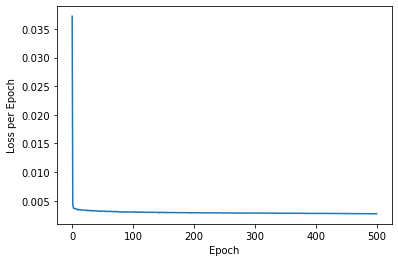

In [24]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
plt.xlabel('Epoch')
plt.ylabel('Loss per Epoch')

In [25]:
last_train_batch = train_scaled[-12:]

In [26]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [27]:
model.predict(last_train_batch)

array([[0.17611812]], dtype=float32)

In [28]:
test_scaled[0]

array([0.07579758])

In [29]:
test_predictions = []

first_eval_batch = train_scaled[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [30]:
test_predictions

[array([0.17611812], dtype=float32),
 array([0.23071185], dtype=float32),
 array([0.29638904], dtype=float32),
 array([0.3963827], dtype=float32),
 array([0.5269947], dtype=float32),
 array([0.6699913], dtype=float32),
 array([0.8354134], dtype=float32),
 array([0.8368552], dtype=float32),
 array([0.75649774], dtype=float32),
 array([0.5565915], dtype=float32),
 array([0.3698857], dtype=float32),
 array([0.20746803], dtype=float32),
 array([0.19582793], dtype=float32),
 array([0.23831214], dtype=float32),
 array([0.3048253], dtype=float32),
 array([0.39085937], dtype=float32),
 array([0.49969393], dtype=float32),
 array([0.6490044], dtype=float32),
 array([0.81226176], dtype=float32),
 array([0.81851804], dtype=float32),
 array([0.7270602], dtype=float32),
 array([0.53592074], dtype=float32),
 array([0.35398936], dtype=float32),
 array([0.20569342], dtype=float32),
 array([0.19109654], dtype=float32),
 array([0.23404579], dtype=float32),
 array([0.30051854], dtype=float32),
 array([0.3

In [31]:
true_predictions = scaler.inverse_transform(test_predictions)

In [32]:
test['Predictions'] = true_predictions

C:\Users\17049\AppData\Local\Temp/ipykernel_17864/4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [33]:
test

,AverageTemperature,Predictions
dt,,
2010-01-01,10.090,11.913827
2010-02-01,10.353,12.906341
2010-03-01,12.437,14.100353
2010-04-01,12.283,15.918237
2010-05-01,15.895,18.292764
2010-06-01,20.724,20.892442
2010-07-01,23.636,23.899816
2010-08-01,23.545,23.926027
2010-09-01,22.420,22.465129


<AxesSubplot:xlabel='Date', ylabel='Temperature'>

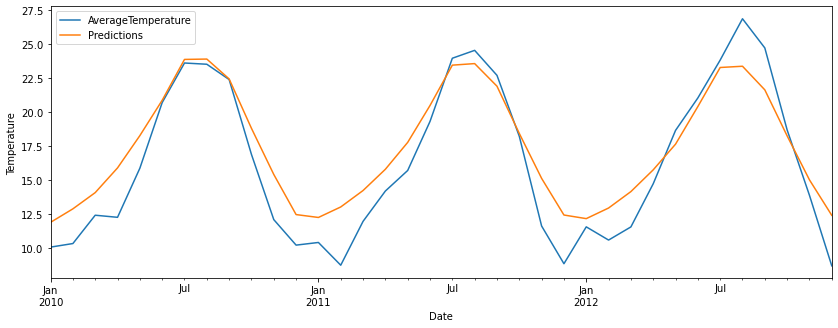

In [35]:
test.plot(figsize=(14,5),xlabel='Date',ylabel='Temperature')

In [35]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['AverageTemperature'],test['Predictions']))
print(rmse)

2.380360869862368
